### Finite difference methods (FDM) for partial differential equations (PDE)

Main references

[^1]: Timothy Sauer (2017) *Numerical Analysis* 3rd Edition. (p. 348)

#### Take-aways

After studying this chapter, we will be able to

TBF



#### Overview


- We will apply a single method, finite difference method, for various problems. (In other chapters, we usually study multiple methods for a single, general problem.)
- PDEs can be very different as a mathematical/numerical problem with a slight change in some term, factor, or the magnitude of coefficients. Hence, a careful classification of PDEs is worth attention.
- Even changing only the boundary conditions (with the same PDE) can change the nature of the problem dramatically. Hence, a careful classification of the boundary conditions is worth attention.


#### Basics of PDE

- Differential equations with two or more independent variables.
- Many applications, if not most, can be written in PDE.
  - Vibrations
    - [(recommended optional) Video: Singing plates - Standing Waves on Chladni plates](https://youtu.be/wYoxOJDrZzw),
    - [(recommended optional) Video: 2D Standing Waves with Sand (Variable Frequency)](https://youtu.be/6yV17h26IIc), 
  - Heat conduction
    - [(recommended optional) Video: PDE | Heat equation: intuition](https://youtu.be/b-LKPtGMdss)
    - [(recommended optional) Understanding Conduction and the Heat Equation](https://youtu.be/6jQsLAqrZGQ)
- Mathematical + numerical solution to PDE allow us to see what would happen even without physical experiments. (e.g., Vibrations of membrane with different shapes and clapping conditions)
  - [(recommended optional) Video: But what is a partial differential equation?](https://youtu.be/ly4S0oi3Yz8). 
  - Depending on your interest, watching other videos in the same series may help. But they focus on mathematical beauty and ideas behind solvable cases. (separation of variable, Fourier seires/Fourier transform, phase space, etc. - you don't need to know these, but they are only to tickle your curiosity.)
  - Our class focuses on when they are not solvable analytically, hence need to resort to numerical methods.

##### Classfication of 2nd order PDE

Given a 2nd order PDE

$$
A u_{x x}+B u_{x y}+C u_{y y}+F\left(u_x, u_y, u, x, y\right)=0,
$$

the PDE is called

| name | condition |
|---|---|
| parabolic | $$B^2 - 4AC = 0$$ |
| hyperbolic | $$B^2 - 4AC > 0$$ |
| elliptic | $$B^2 - 4AC < 0$$ |


#### FDM for Heat equation


**Remark**: Heat equation is the prototype of the parabolic PDEs.


> **Problem of interest** (Heat equation)
>
> Given $f:(a,b) \to \mathbb{R}$ and $l,r:[0,\infty)\to{\mathbb{R} }$, find $u:[a,b]\times[0,\infty) \to \mathbb{R}$ that satisfies
>     
> $$
> \left\{\begin{array}{l}
> u_t=D u_{x x} \text { for all } a \leq x \leq b, t \geq 0 \\
> u(x, 0)=f(x) \text { for all } a \leq x \leq b \\
> u(a, t)=l(t) \text { for all } t \geq 0 \\
> u(b, t)=r(t) \text { for all } t \geq 0
> \end{array}\right.,
> $$
>
> where $D > 0$.


#### Common settings/Notation

| symbol | meaning |
|---|---|
| $k$ | time step size |
| $h$ | spatial grid spacing |
| $u(x_i, t_j)$ | true solution evaluated at $(x_i, t_j)$ |
| $w_{i, j}$ | numerical solution meant to approximate $u(x_i, t_j)$ |


**Remark** (Heat and diffusion equation)

- Heat equation is a special case of diffusion equation. 
  - Diffusion equation describes spreading-out behaviors of matter. 
  - Heat equation describes transfer of heat density (i.e., temperature).


**Remark** (Interpretation of the equation given above)

- The above equation describes heat transfer of a rod (spatial dimension 1).
  - The initial temperature distribution at the location $x$ is given by $f(x)$.
  - $l(t)$ and $r(t)$ prescribe temperature at the end points.
  - The above equation assumes complete insulation on the lateral surface of the rod.
  - Diffusion coefficient or heat conductivity $D$ governs the rate of heat transfer: $D$ large $\rightarrow$ fast transfer; $D$ small $\rightarrow$ slow transfer.

##### Forward difference method

**Idea**: confine the domain to a set of grid points, and replace differential operators with their discrete counterparts of finite difference form.


**2D Grid domain**

- We need two axes for time $t$ and space $x$.
- Consider a uniform grid domain with the common settings mentioned above.

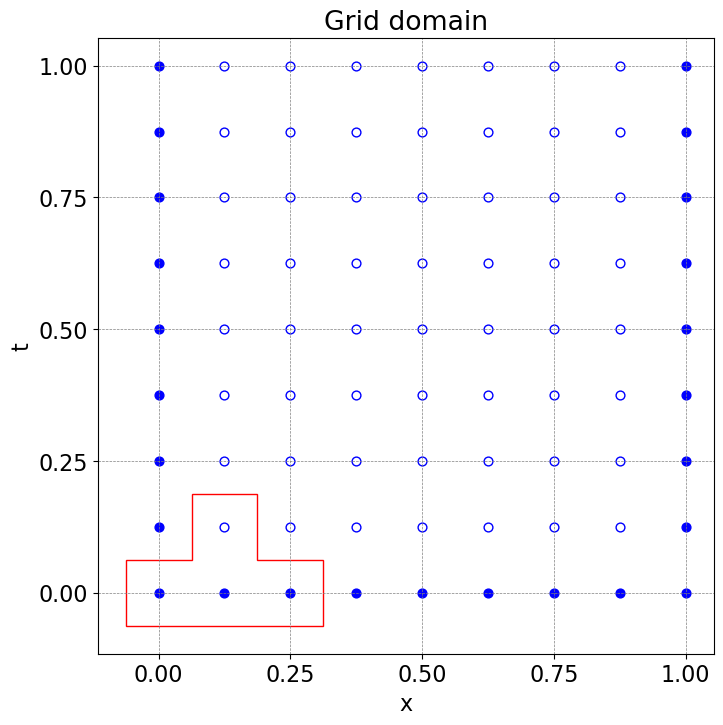

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(8, 8))

L = 1
T = 1
N = 8
K = 8
h = L/N
k = T/K

x = np.linspace(0, L, N+1)
t = np.linspace(0, L, N+1)
xx, tt = np.meshgrid(x, t)

# grid domain
gd = np.zeros((N+1, N+1))

gd[0, :] = 1
# gd[-1, :] = 1
gd[:, 0] = 1
gd[:, -1] = 1

#%% Add a stencil polygon
polygon_points = np.array([[-0.5*h, -0.5*k], [2.5*h, -0.5*k], 
        [2.5*h, 0.5*k],  [1.5*h, 0.5*k], [1.5*h, 1.5*k],
        [0.5*h, 1.5*k], [0.5*h, 0.5*k], [-0.5*h, 0.5*k]])
ax.add_patch(plt.Polygon(polygon_points, closed=True, fill=None, edgecolor='r'))


ax.scatter(xx[gd==0], tt[gd==0], c='w', edgecolors='b', s=40)
ax.scatter(xx[gd==1], tt[gd==1], c='b', s=40)
ax.set_aspect('equal')
ax.set_xticks(x[::2])
ax.set_yticks(t[::2])
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

ax.set_title('Grid domain')
plt.show()



**Centered-difference for 2nd derivative**

$$
u_{x x}(x, t) \approx \frac{1}{h^2}(u(x+h, t)-2 u(x, t)+u(x-h, t))
$$


This approximation is intuitively sensible:

$$
\begin{split}
f'(x+h) &\approx \frac{f(x+h)-f(x)}{h}\\
f'(x) &\approx \frac{f(x)-f(x-h)}{h}\\
f''(x) &\approx \frac{f'(x+h)-f'(x)}{h}\\
&\approx \frac{\frac{f(x+h)-f(x)}{h}-\frac{f(x)-f(x-h)}{h}}{h}\\
&\approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2}
\end{split}
$$


**Forward difference for 1st derivative**

$$
u_t(x, t) \approx \frac{1}{k}(u(x, t+k)-u(x, t))
$$

Replace $u_{xx}$ and $u_t$ with these formulas in the heat equations:

$$
\frac{D}{h^2}\left(w_{i+1, j}-2 w_{i j}+w_{i-1, j}\right) = \frac{1}{k}\left(w_{i, j+1}-w_{i j}\right)
$$

Rearrange the discrete version of heat equation:

$$
\begin{aligned}
w_{i, j+1} & =w_{i j}+\frac{D k}{h^2}\left(w_{i+1, j}-2 w_{i j}+w_{i-1, j}\right) \\
& =\sigma w_{i+1, j}+(1-2 \sigma) w_{i j}+\sigma w_{i-1, j},
\end{aligned}
$$

where $\sigma=Dk/h^2$.


In matrix form, the method reads:

$$
\left[\begin{array}{c}
w_{1, j+1} \\
\vdots \\
w_{m, j+1}
\end{array}\right]=\left[\begin{array}{ccccc}
1-2 \sigma & \sigma & 0 & \cdots & 0 \\
\sigma & 1-2 \sigma & \sigma & \ddots & \vdots \\
0 & \sigma & 1-2 \sigma & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & \sigma \\
0 & \cdots & 0 & \sigma & 1-2 \sigma
\end{array}\right]\left[\begin{array}{c}
w_{1 j} \\
\vdots \\
w_{m j}
\end{array}\right]+\sigma\left[\begin{array}{c}
w_{0, j} \\
0 \\
\vdots \\
0 \\
w_{m+1, j}
\end{array}\right] .
$$

**Stencil** (dependency of numerical data)

It is good to have a picture, called *stencil*, that shows what data determines what values.

- **Explicit**: unknown values are determined by a formula involving data that are already known.
- **Implicit**: unknown values cannot be determined by an explicit formula, and require to solve an equation.

![Forward difference stencil](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Explicit_method-stencil.svg/2880px-Explicit_method-stencil.svg.png)

Figure: Stencil of forward difference method (source: Wikipedia)

The figure uses different index from us. Substitute:

- $n\gets j$
- $j\gets i$




**Question**

Verify that our settings are explicit.


##### Computation


**Example** (Heat equation)
Find $u(x, t)$ that satisfies
    
$$
\left\{\begin{array}{ll}
u_t=u_{x x} & \text { for all } a \leq x \leq b, t \geq 0 \\
u(x, 0)=\frac{1}{\sqrt{4\pi m}} e^{- x^2/(2m)} & \text { for all } a \leq x \leq b \\
u(-1, t)=u(1, t)=\frac{1}{\sqrt{4\pi m}} e^{- 1/(2m)} & \text { for all } t \geq 0 \\
\end{array}\right.
$$

where $m > 0$ is a constant. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

def fw_FDM(w, par):
    """
    Return the next time of the heat equation using forward difference method.
    
    Input:
        w: (1D array) Temperature distribution at time t.
        par: (dict) Parameter for the forward difference method.
    Output:
        w_new: (1D array) Temperature distribution at time t+1.
    """
    s = par['D']*par['k']/(par['h']*par['h'])

    w_new = np.zeros_like(w[1:-1])

    # Main line of the forward difference method
    w_new = w[1:-1] + s*(w[2:] - 2.*w[1:-1] + w[:-2])
    """
    This line is equivalent to the following for loop, but much faster.
    N = len(w)
    for i in range(1, N+1):
        w_new[i] = w[i] + s*(w[i-1] - 2*w[i] + w[i+1])
    """

    return w_new


In [4]:

def solve_heat_eq(ic, bc1, bc2, D, a, b, T, N, K, t0=0.):
    """
    Return numerical solution of Heat equation using forward difference method.
    
    Input:
        ic: (1D array) Initial temperature distribution.
        bc1: (float or 1D array) Boundary condition at x=a.
        bc2: (float or 1D array) Boundary condition at x=b.
        D: (float) Diffusion coefficient.
        a: (float) Left boundary.
        b: (float) Right boundary.
        T: (float) Final time.
        N: (int) Number of spatial grid points.
        K: (int) Number of time grid points.
        t0: (float) Initial time. (default=0.)
    Output:
        w: (2D array) Numerical solution.
    """
    w = np.zeros((N+2, K+1))
    h = (b-a)/(N+1)
    k = (T-t0)/K
    par = {'D': D, 'h': h, 'k': k}

    # Initial/boundary condition
    w[:, 0] = ic
    w[0, :] = bc1
    w[-1, :] = bc2

    # time marching
    for j in range(K):
        w[1:-1, j+1] = fw_FDM(w[:,j], par=par)

    return w

In [21]:
N = 30
K = 10
a = -1.
b = 1.
D = 1.

# Try:  T = 0.05 or bigger to see stability issue, 
#       T = 0.03 for stable solution
T = 0.05 
x = np.linspace(a, b, N+2)
t = np.linspace(0, T, K+1)

**Sanity check**

Compute the numerical solution to
    
$$
\left\{\begin{array}{ll}
u_t=u_{x x} & \text { for all } a \leq x \leq b, t \geq 0 \\
u(x, 0)=\sin(2\pi x) & \text { for all } a \leq x \leq b \\
u(-1, t)=u(1, t)=0 & \text { for all } t \geq 0 \\
\end{array}\right.
$$

True solution is available to this problem:

$$
u(x,t) = e^{-4\pi^2 t}\sin(2\pi x)
$$

In [22]:
#%% Initial condition
# set initial condition
aa = 2.
CC = 2*np.pi/(b-a)
AA = aa*CC
f = lambda m, x: np.sin(AA*x) 
m = 0.

ic = f(m, x)
bc1 = f(m, a)
bc2 = f(m, b)

# solve heat equation
w = solve_heat_eq(ic, bc1, bc2, D, a, b, T, N, K)

# true solution
u_ = lambda x, t: np.exp(-AA*AA*t)*np.sin(AA*x)
u = u_(x.reshape(-1, 1), t)
"""The above line is equivalent to the following for loop, but much faster.
for j in range(K+1):
    u[:, j] = u_(x, t[j])
"""

'The above line is equivalent to the following for loop, but much faster.\nfor j in range(K+1):\n    u[:, j] = u_(x, t[j])\n'

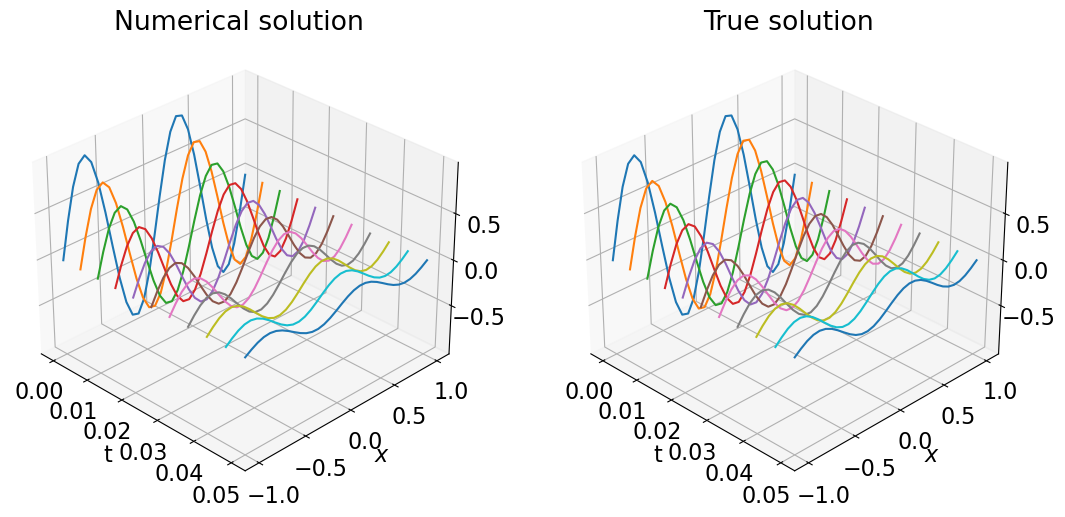

In [23]:
#%% plot
fig, ax = plt.subplots(1,2, figsize=(13, 6.5), subplot_kw={'projection':'3d'})

for j in range(K+1):
    ax[0].plot(t[j] * np.ones_like(x), x, w[:, j], label='Numerical')
    ax[0].set_title('Numerical solution')
    ax[1].plot(t[j] * np.ones_like(x), x, u[:, j], label='True')
    ax[1].set_title('True solution')

# Change the angle of projection
for j in range(len(ax)):
    ax[j].set_xlabel('t')
    ax[j].set_ylabel('$x$')
    ax[j].view_init(elev=30, azim=-45)

plt.show()


In [24]:
#%% Initial condition
# set initial condition

f = lambda m, x: np.exp(-x*x/(2.*m))/np.sqrt(4.*np.pi*m)

m = 0.05
ic = f(m, x)
bc1 = f(m, a)
bc2 = f(m, b)

w = solve_heat_eq(ic, bc1, bc2, D, a, b, T, N, K)

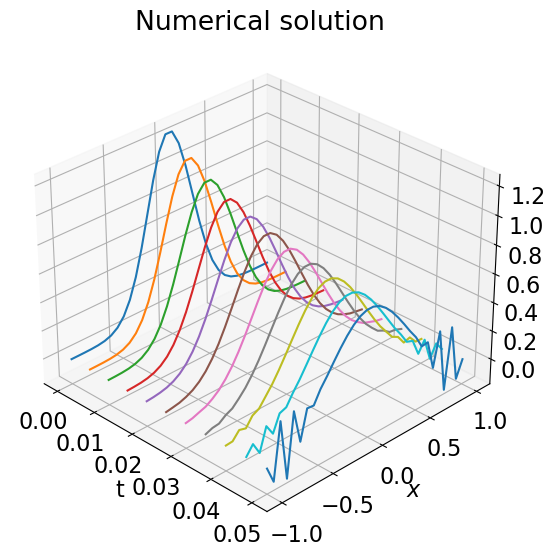

In [25]:
#%% plot
fig, ax = plt.subplots(1,1, figsize=(6.5, 6.5), subplot_kw={'projection':'3d'})

ax = [ax]

for j in range(K+1):
    ax[0].plot(j*T/K * np.ones_like(x), x, w[:, j])

# Change the angle of projection
for j in range(1):
    ax[j].set_xlabel('t')
    ax[j].set_ylabel('$x$')
    ax[j].view_init(elev=30, azim=-45)

ax[0].set_title('Numerical solution')

plt.show()


#### Convergence of forward difference method



**Remark** ("stability + consistency = convergence" still works in PDE.)

- As in ODE, there are two sources of errors: discretization (i.e., truncation error) and amplification of the inexact history (stability issue)
- As in the methods for ODE, local truncation errors (LTE) give a good picture of total erros as long as the method is stable. (Sauer (2017) p. 396)
- In the current settings, LTE comes from discretizing differential operators.
  - Second order in space (centered difference) and first order in time (forward difference).
  - $\mathrm{LTE}={\mathcal{O}\!\left( h^2 + k \right)} ={\mathcal{O}\!\left( h^2\right)} + {\mathcal{O}\!\left( k \right)}$.

#### Stability of Finite Difference Methods



**Idea** 

- Looking at matrix form, time evolution of the forward FDM can be thought of iterative methods: $w_{k+1}=A w_k + b$, where $A$ is a matrix, and $b$ is a vector.
- Study eigenvalue of $A$ to see how errors amplify.


##### Vol Neumann stability analysis



$$
A=\left[\begin{array}{ccccc}
2 & -1 & 0 & \ldots & 0 \\
-1 & 2 & \ddots & & \vdots \\
0 & \ddots & \ddots & -1 & 0 \\
\vdots & & -1 & 2 & -1 \\
0 & \ldots & 0 & -1 & 2
\end{array}\right]
$$

**Theorem** (Discrete Laplacian matrix)

1. The eigenvectors of the matrix $A$ are, for $j = 1, \cdots , m$, the vectors 
$$
v_j = \left[\sin \frac{j \pi}{m+1}, \sin \frac{2 \pi j}{m+1}, \ldots, \sin \frac{m \pi j}{m+1}\right]^T .
$$  

2. The corresponding eigenvalues are 

$$
\lambda_j = 2 − 2 \cos(\frac{\pi  j}{m + 1}) = 4 \sin^2(\frac{\pi  j}{2(m + 1)}),
$$

3. $A$ is an SPD matrix with eigenvalues $0 < \lambda_j < 4$.


**Theorem** (Conditional stability of Forward difference method)

Let $h$ be the space step and $k$ be the time step for the Forward Difference Method applied to the heat equation given above with D > 0. If $Dk/h^2 < 1/2$, the Forward Difference Method is stable.

**Terminology**

The forward finite difference method is said to be *conditionally stable* since its stability depends on the chocie of step sizes.

#### Backward Difference Method for parabolic equations

##### Method

**Idea**: Use implicit (backward) Euler approximation for time derivative.

**Stencil** (Backward Euler)

![Stencil for backward Euler time discretization](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Implicit_method-stencil.svg/1920px-Implicit_method-stencil.svg.png)

Figure: Wikipedia

**Remark**

- This is reminiscent of how the implicit Euler method resolves stiffness issue of the explicit Euler method in numerical ODE study. (See [Stiffness resolved by implicit Euler in a simple 1D example](https://jhparkyb.github.io/resources/notes/na/ex_StiffODE1DImplicitEuler_lp2000.png))
- Since the backward difference method is unconditionally stable, we can take long step sizes. As a result, we can test the accuracy of the method by using many different step sizes. 
- In contrast, the forward difference method is conditionally stable. Thus, we have limited options for step sizes. This may prevent us from experimenting the convergence of the method in a meaningful way. However, the forward difference method allows us to test stability issues instead.

**Terminology** (Dirichlet and Neumann boundary conditions)

- Dirichlet boundary conditions
  - prescribe the value of the solution.
  - For the heat equation, they correspond to temperature modulation at the end points by external heat sources.
- Neumann boundary conditions
  - prescribe the derivative of the solution.
  - For the heat equation, they correspond to insulation at the end points by controlling heat flux rate.
- Homogeneous boundary conditions
  - We call boundary conditions *homogeneous* when the prescribed values are 0, whether they are derivatives or values of the solution.
  - For example, *homogeneous Neumann boundary conditions* corresponds to complete insulation (no heat flux in or out of the rod) while *homogeneous Dirichlet boundary conditions* corresponds to cooling the ends of the rod to zero absolute temperature.

#### Crank-Nicolson Method

**Stencil** (Crank-Nicolson)

![Stencil for Crank-Nicolson method](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Crank-Nicolson-stencil.svg/1920px-Crank-Nicolson-stencil.svg.png)

Figure: Wikipedia

###### Camparisons of numerical solutions of heat equation: forward, backward, and Crank-Nicolson methods 


**Camparisons of numerical solutions of heat equation**

| Forward | Backward | Crank-Nicolson |
|---|---|---|
| ![Forward](https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/HeatEquationExplicitApproximate.svg/1920px-HeatEquationExplicitApproximate.svg.png) | ![Backward](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/HeatEquationImplicitApproximate.svg/1920px-HeatEquationImplicitApproximate.svg.png) | ![Crank-Nicolson](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/HeatEquationCNApproximate.svg/1920px-HeatEquationCNApproximate.svg.png) | 

Figure: Wikipedia

#### Finite difference method for hyperbolic equations



##### Problem (Wave equation)

<p style="color:red;">To be updated</p>

> **Problem of interest** (Heat equation)
>
> Given $f:(a,b) \to \mathbb{R}$ and $l,r:[0,\infty)\to{\mathbb{R} }$, find $u:[0,\infty)\times[a,b] \to \mathbb{R}$ that satisfies
>     
> $$
> \left\{\begin{array}{l}
> u_t=D u_{x x} \text { for all } a \leq x \leq b, t \geq 0 \\
> u(x, 0)=f(x) \text { for all } a \leq x \leq b \\
> u(a, t)=l(t) \text { for all } t \geq 0 \\
> u(b, t)=r(t) \text { for all } t \geq 0
> \end{array}\right.
> $$



**Remark** (Basic intuition of wave equation)

- $u_t$ is not the speed of the wave. It is the time derivative of the amplitude of the wave. 
- d'Alembert's formula gives the sense of why $c$ is the speed of the wave.
  - d'Alembert's formula gives the analytic solution for certain initial and boundary condition. (See Wikipedia page for details.)


**Remark** (Constructing finite difference method)

- 1st time step
  - To keep 2nd order accuracy, we use centered-difference quotient when incorporating $u_t$ from the initial data.
  - This introduces a negative time index $w_{i,-1}$. However, this can be resolved by combining (a) the initial data and (b) finite difference formula for time marching ($j=0$).
  - Though this may look unphysical (involvement of negative time), there is no problem from the degrees of freedom point of view: use right amount of information to specify right amount of unknowns. 

**Remark** (stability of wave equation)

- Notice the trick that when a numerical update involves past two steps of history, we may consider stacking two sets to make higher dimensional problem. This is reminescent of converting 2nd order ODE to vector form of 1st order ODE.
- The CFL condition for the wave equation says "the distance traveled by the wave ($ck$) in unit time must not exceed the spatial spacing $h$." 
- The theorem says that the CFL condition is a sufficient condition for stability in the wave equation. However, this is not true for more general hyperbolic equations. ( Sauer (2017) p. 417 )

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)